# Exploration

## Setup, EDA, Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#from datetime import datetime

#from sklearn.model_selection import train_test_split, GridSearchCV, \
cross_val_score
#from sklearn.impute import SimpleImputer
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, \
#BaggingClassifier, ExtraTreesClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, f1_score, recall_score, \
#precision_score, confusion_matrix, classification_report, roc_curve, auc, \
#average_precision_score
#from sklearn.preprocessing import StandardScaler, LabelEncoder, \
#MinMaxScaler, OneHotEncoder
#from sklearn.pipeline import Pipeline
#from xgboost import XGBClassifier
#from imblearn.over_sampling import SMOTE

#import warnings
#warnings.filterwarnings('ignore')

### Load in Data

In [ ]:
df = pd.read_csv('../data/investments_VC_cleaned.csv', encoding = "unicode_escape")

### Preprocessing & Feature Engineering

In [ ]:
data.columns

Index(['name', 'market', 'funding_total_usd', 'status', 'country_code',
       'state_code', 'region', 'city', 'funding_rounds', 'founded_at',
       'founded_month', 'founded_year', 'first_funding_at', 'last_funding_at',
       'seed', 'venture', 'equity_crowdfunding', 'undisclosed',
       'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

#### Missing Values

* I am removing rows with missing status or company name. 
* I am also dropping rows with a missing founded_year because this feature has high importance in many of the models & thus would prefer not to impute at risk of skewing the model. I tried both dropping and keeping  the missing founded_years (imputed). The proportion of companies in each status category & model results are fairly similar with & without imputing the median of year so I am comfortable dropping these rows.

In [ ]:
data = data.dropna(subset=['status', 'name', 'founded_year'])
data.isnull().sum()

name                        0
market                   1801
funding_total_usd           0
status                      0
country_code             2936
state_code              13332
region                   2936
city                     3357
funding_rounds              0
founded_at                  0
founded_month               0
founded_year                0
first_funding_at            0
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C                     0
round_D                     0
round_E                     0
round_F                     0
round_G                     0
round_H                     0
dtype: int64

In [ ]:
len(data)

37563

In [ ]:
# filling categoricals
data = data.fillna(value={'market': 'other', 'country_code': 'other', 
                          'region': 'other', 'city': 'other', 
                          'state_code': 'other'})

### Exploratory Analysis - Full Dataset

In [ ]:
data = df

In [ ]:
print(data.info())
data.head()

In [ ]:
df.describe()

In [ ]:
data.isnull().sum()

In [ ]:
data['founded_at'].head()

In [ ]:
data['region'].value_counts()

In [ ]:
data['city'].value_counts()

In [ ]:
data['state_code'].value_counts()

In [ ]:
data['country_code'].value_counts()

In [ ]:
# inspecting market feature - lots of catgories
print("Number of unique markets: ", len(set(data['market'])))
print("Markets with more than 200 companies: ",      
      str(sum(data['market'].value_counts() >= 200)))

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
data['market'].value_counts()[:30].plot(kind='barh')

In [ ]:
# same deal with region
print("Number of unique regions: ", len(set(data['region'])))
print("Regions with more than 200 companies: ",      
      str(sum(data['region'].value_counts() >= 200)))

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
data['region'].value_counts()[:30].plot(kind='barh')

In [ ]:
data.hist('equity_crowdfunding', bins=40) 
# there are some very skewed columns in the funding area

### Preprocessing & Feature Engineering

In [ ]:
data.columns

Index(['name', 'market', 'funding_total_usd', 'status', 'country_code',
       'state_code', 'region', 'city', 'funding_rounds', 'founded_at',
       'founded_month', 'founded_year', 'first_funding_at', 'last_funding_at',
       'seed', 'venture', 'equity_crowdfunding', 'undisclosed',
       'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

# fine exploration data


# inizio data cleaning di data

#### Missing Values

* I am removing rows with missing status or company name. 
* I am also dropping rows with a missing founded_year because this feature has high importance in many of the models & thus would prefer not to impute at risk of skewing the model. I tried both dropping and keeping  the missing founded_years (imputed). The proportion of companies in each status category & model results are fairly similar with & without imputing the median of year so I am comfortable dropping these rows.

In [ ]:
data = data.dropna(subset=['status', 'name', 'founded_year'])
data.isnull().sum()

name                        0
market                   1801
funding_total_usd           0
status                      0
country_code             2936
state_code              13332
region                   2936
city                     3357
funding_rounds              0
founded_at                  0
founded_month               0
founded_year                0
first_funding_at            0
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C                     0
round_D                     0
round_E                     0
round_F                     0
round_G                     0
round_H                     0
dtype: int64

In [ ]:
len(data)

37563

In [ ]:
# filling categoricals
data = data.fillna(value={'market': 'other', 'country_code': 'other', 
                          'region': 'other', 'city': 'other', 
                          'state_code': 'other'})

10th percentile of founded_year:  2000.0
Num Rows before 2000:  3518


34045

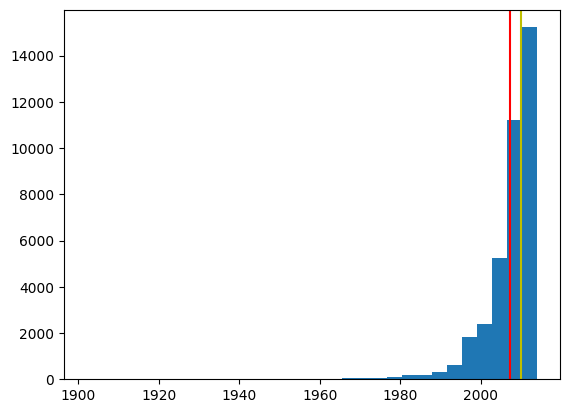

In [ ]:
# distribution of non NA years 
plt.hist(data['founded_year'][~data['founded_year'].isnull()], bins=30)
plt.axvline(x=np.nanmean(data['founded_year']), color='r')
plt.axvline(x=np.nanmedian(data['founded_year']), color='y')

p10 = np.percentile(data['founded_year'][~data['founded_year'].isnull()], 10)
print("10th percentile of founded_year: ", p10)

#10th percentile year is 2000, we will subset for startups founded on or after 2000
print("Num Rows before 2000: ", len(data[data['founded_year'] < 2000]))
data = data[data['founded_year'] >= 2000].reset_index(drop=True)
len(data)

In [ ]:
len(df[(df['founded_year'] < 2000) & (df['status'] != 'operating')])

838

Date data - convert to datetime:

In [ ]:
data['founded_at'] = [datetime.strptime(day, '%Y-%m-%d') for day \
                      in data['founded_at'][~data['founded_at'].isnull()]]
data['first_funding_at'] = [datetime.strptime(day, '%Y-%m-%d').date() for day \
                            in data['first_funding_at']]
data['last_funding_at'] = [datetime.strptime(day, '%Y-%m-%d').date() for day \
                            in data['last_funding_at']]
data['founded_month'] = [datetime.strptime(mth, "%Y-%m").month for mth in data['founded_month']]

Fill year & founded_at with simple imputer (only if not removing NaN rows). Since the data is skewed (see plot above), we will use median rather than mean.

In [ ]:
# uncomment the below to impute founded_year with mean, only if we are not 
# dropping nans for this feature

#imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

#data['founded_year'] = imp_median.fit_transform(data[['founded_year']])
#data['founded_at'] = imp_median.fit_transform(data[['founded_at']])

In [ ]:
data['founded_at'] = pd.to_datetime(data['founded_at'])
data['founded_year'] = [day.year for day in data['founded_at']]

In [ ]:
data['founded_at'].value_counts()

founded_at
2012-01-01    2100
2011-01-01    2096
2010-01-01    1810
2009-01-01    1561
2013-01-01    1535
              ... 
2011-04-03       1
2000-08-09       1
2009-08-07       1
2014-05-25       1
2007-01-21       1
Name: count, Length: 2935, dtype: int64

In [ ]:
data.isna().sum()

name                    0
market                  0
funding_total_usd       0
status                  0
country_code            0
state_code              0
region                  0
city                    0
funding_rounds          0
founded_at              0
founded_month           0
founded_year            0
first_funding_at        0
last_funding_at         0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H                 0
dtype: int64

Basic data cleaning:

In [ ]:
# getting rid of extra spaces in market, city, state code, region
data['market'] = [x.strip() for x in data['market']]
data['country_code'] = [x.strip() for x in data['country_code']]
data['state_code'] = [x.strip() for x in data['state_code']]
data['region'] = [x.strip() for x in data['region']]
data['city'] = [x.strip() for x in data['city']]

In [ ]:
data.dtypes

name                            object
market                          object
funding_total_usd               object
status                          object
country_code                    object
state_code                      object
region                          object
city                            object
funding_rounds                 float64
founded_at              datetime64[ns]
founded_month                    int64
founded_year                     int64
first_funding_at                object
last_funding_at                 object
seed                           float64
venture                        float64
equity_crowdfunding            float64
undisclosed                    float64
convertible_note               float64
debt_financing                 float64
angel                          float64
grant                          float64
private_equity                 float64
product_crowdfunding           float64
round_A                        float64
round_B                  

In [ ]:
# need to convert this data type to integer
data['funding_total_usd'].value_counts()

funding_total_usd
0.0            5632
1000000.0       627
100000.0        582
500000.0        573
40000.0         466
               ... 
2251000.0         1
142355891.0       1
32166307.0        1
4220018.0         1
2444963.0         1
Name: count, Length: 10560, dtype: int64

In [ ]:
display(data.iloc[0])

name                               #waywire
market                                 News
funding_total_usd                 1750000.0
status                             acquired
country_code                            USA
state_code                               NY
region                        New York City
city                               New York
funding_rounds                          1.0
founded_at              2012-06-01 00:00:00
founded_month                             6
founded_year                           2012
first_funding_at                 2012-06-30
last_funding_at                  2012-06-30
seed                              1750000.0
venture                                 0.0
equity_crowdfunding                     0.0
undisclosed                             0.0
convertible_note                        0.0
debt_financing                          0.0
angel                                   0.0
grant                                   0.0
private_equity                  

In [ ]:
# data['funding_total_usd'] = [float(num.replace(" ", "0").replace(",", "0").\
#                                    replace("-", "0")) 
#                              for num in data['funding_total_usd']]
#data['funding_total_usd'].dtypes

#### Feature Engineering

In [ ]:
# creating column that labels country as USA or Other
data['international'] = [0 if country=='USA' else 1 for country in data['country_code']]

In [ ]:
#count the USA or international
data['international'].value_counts()
# 0 = USA, 1 = International

international
0    20664
1    13381
Name: count, dtype: int64

In [ ]:
#List of European country codes
european_countries = ['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE', 'GBR']

#Creating the column to rank countries
data['european_or_international'] = ['european' if country in european_countries else 'international' for country in data['country_code']]

In [ ]:
#count the european_or_international column
data['european_or_international'].value_counts()


european_or_international
international    28811
european          5234
Name: count, dtype: int64

### TODO : rinominare 'international' e mettere a posto i nomi


In [ ]:
# creating temporary columns to aid in calculation of time to first funding

data['founded_at_temp'] = [day.date() for day in data['founded_at']]
data['founded_at_temp'] = pd.to_datetime(data['founded_at_temp'], 
                                         format = '%Y-%m-%d')

data['first_funding_at_temp'] = pd.to_datetime(data['first_funding_at'], 
                                               format = '%Y-%m-%d', 
                                               errors='coerce')
data['last_funding_at_temp'] = pd.to_datetime(data['last_funding_at'], 
                                              format = '%Y-%m-%d', 
                                              errors='coerce')

data['time_to_first_funding'] = (data['first_funding_at_temp'] - \
                                 data['founded_at_temp']) / pd.Timedelta(days=365)

data['time_first_to_last_funding'] = (data['last_funding_at_temp'] - \
                                      data['first_funding_at_temp']) / pd.Timedelta(days=365)

In [ ]:
# checking for nulls
print(data['first_funding_at'][data['time_to_first_funding'].isnull()])
print(data['last_funding_at'][data['time_first_to_last_funding'].isnull()])

1030     0020-06-14
4514     0019-11-20
9863     0201-01-01
20287    0007-05-13
21784    0001-05-14
Name: first_funding_at, dtype: object
1030     2013-06-01
4514     2013-04-01
9863     0201-01-01
20287    2014-09-25
21784    0001-05-14
Name: last_funding_at, dtype: object


In [ ]:
# dropping these
data = data.dropna(subset=['time_to_first_funding'])

#### OPTIONAL - Outliers

48269089.89999999
34040
34040


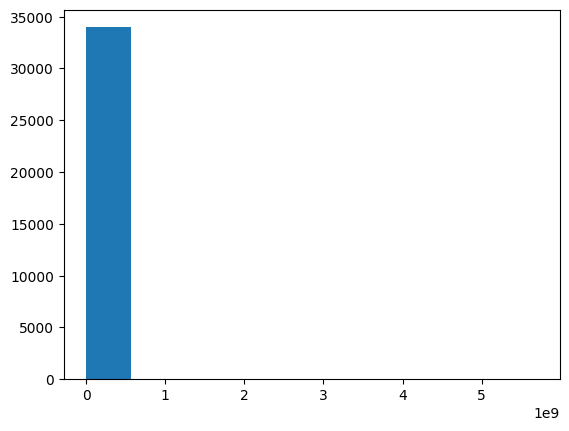

In [ ]:
# Funding total USD
print(np.percentile(data['funding_total_usd'], 95))

plt.hist(data['funding_total_usd'][data['funding_total_usd'] < 408206869399.0])
print(len(data[data['funding_total_usd'] < 408206869399.0]))
print(len(data))

32301
32301
34040


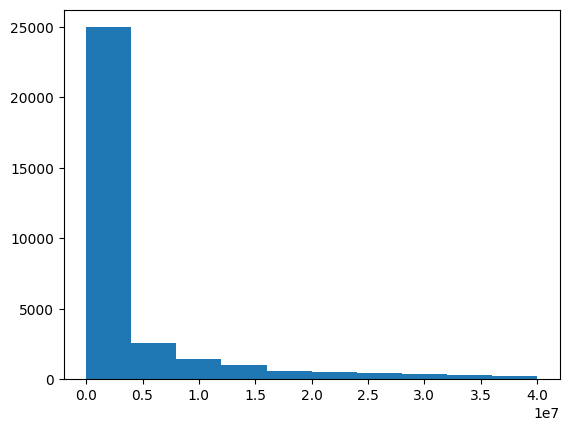

In [ ]:
np.percentile(data['venture'], 95)

plt.hist(data['venture'][data['venture'] < 40000000.0])
print(len(data[data['venture'] < 40000000.0]))
print(len(data[(data['venture'] < 40000000.0) & 
               (data['funding_total_usd'] < 408206869399.0)]))
print(len(data))

In [ ]:
### THIS DOESN'T HELP THE MODELS, SO I COMMENTED THIS OUT

In [ ]:
# uncomment to remove outliers

#data = data[(data['venture'] < 40000000.0) & 
#            (data['funding_total_usd'] < 408206869399.0)].reset_index(drop=True)
#len(data)

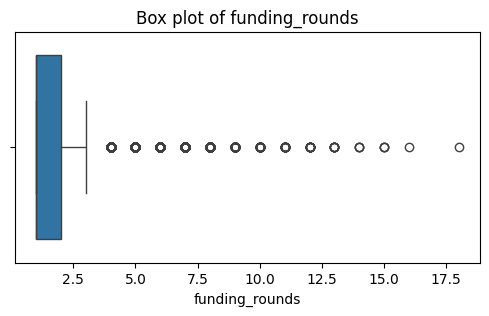

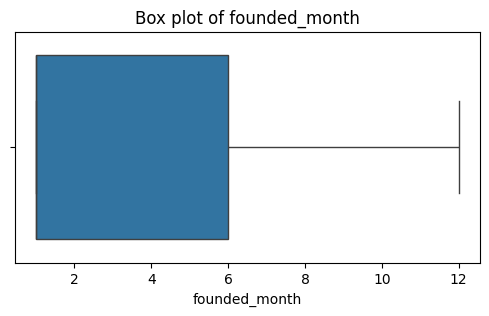

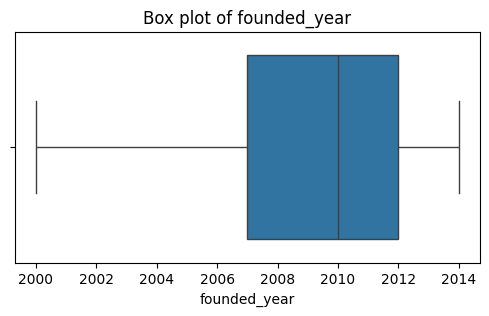

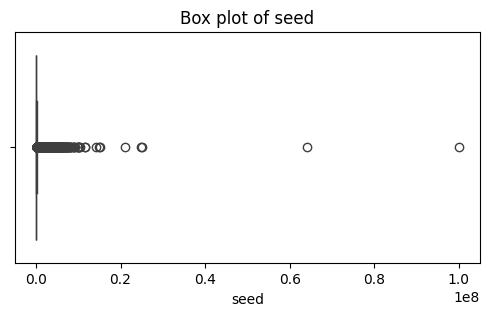

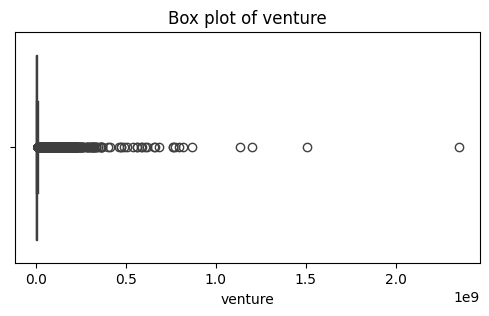

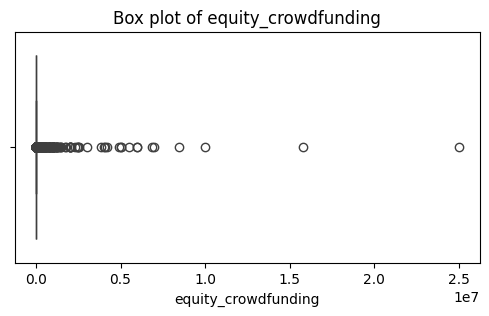

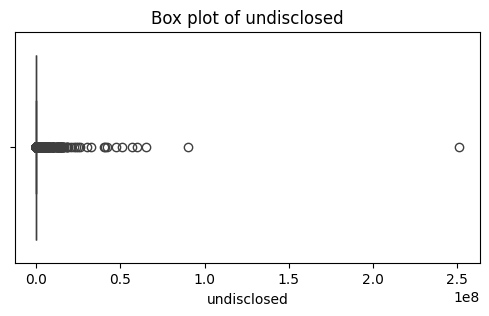

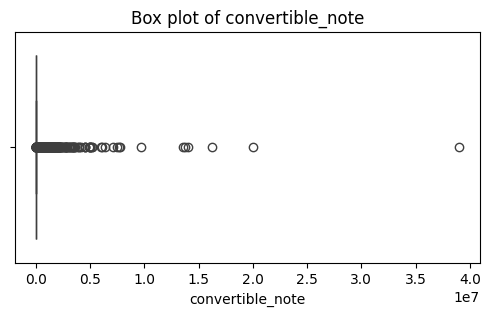

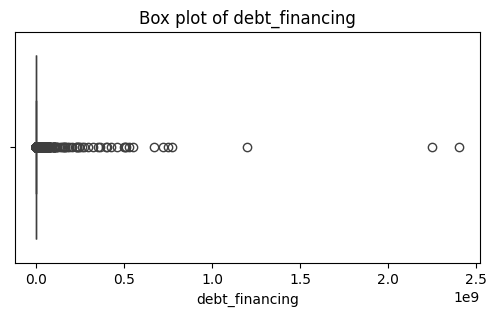

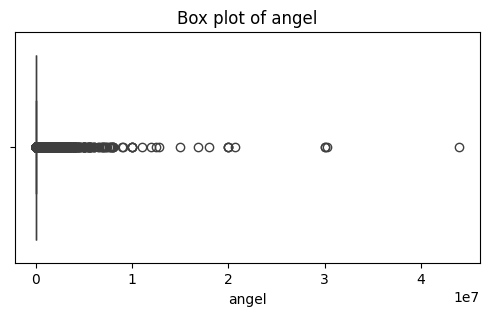

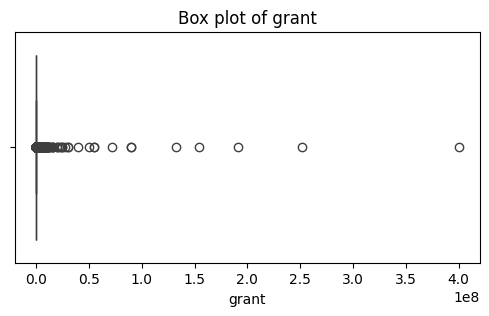

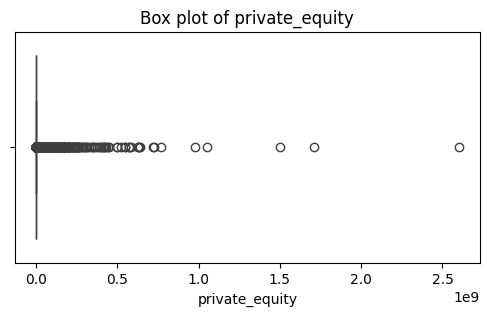

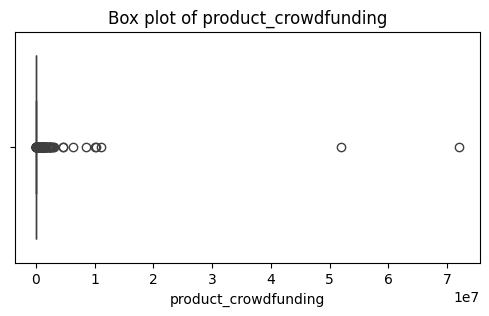

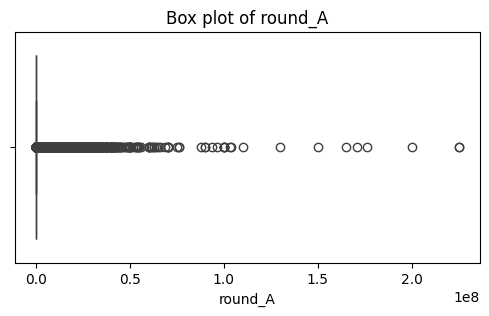

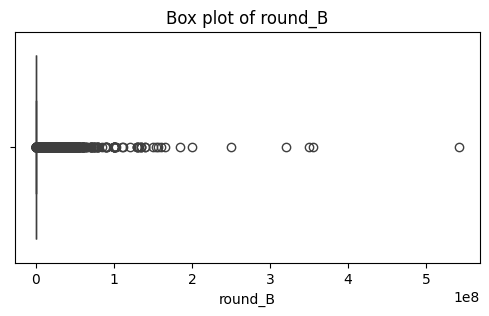

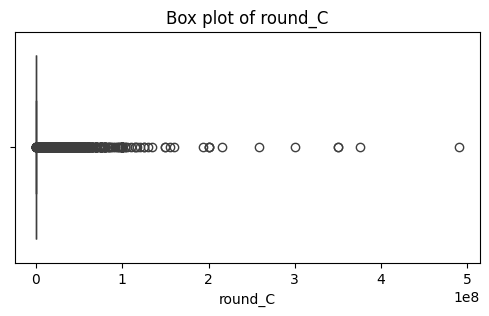

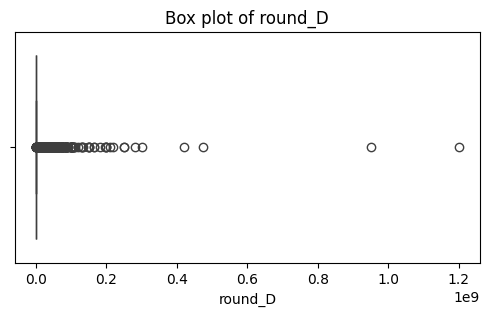

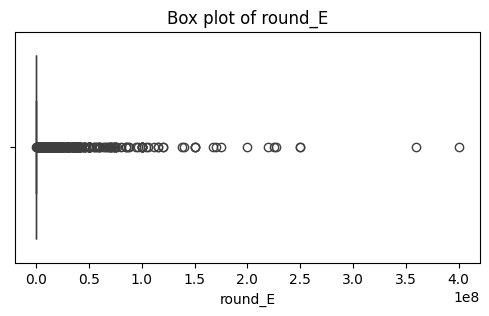

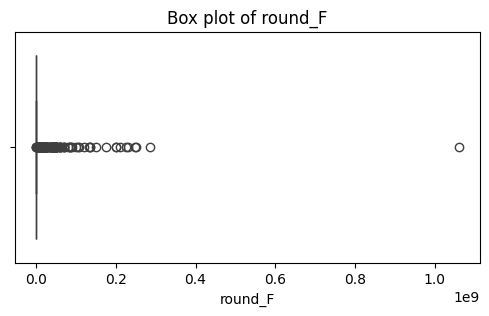

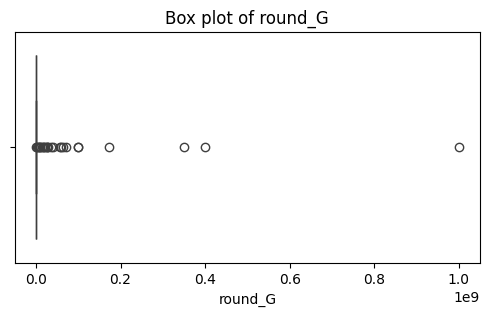

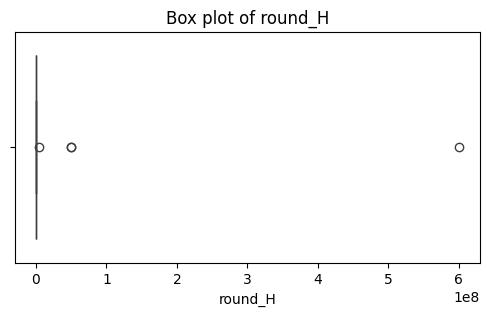

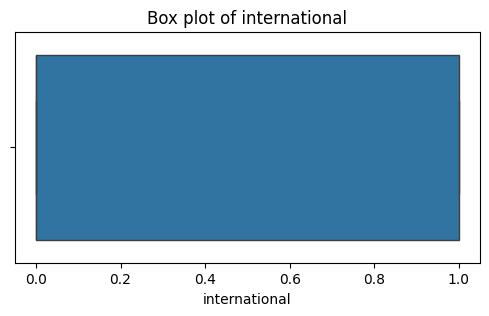

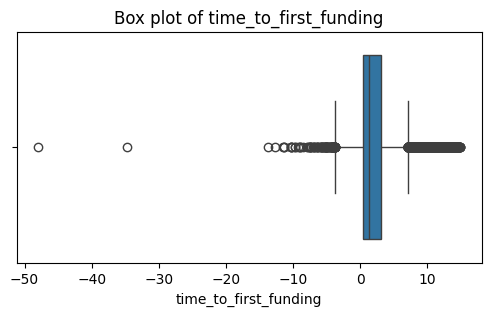

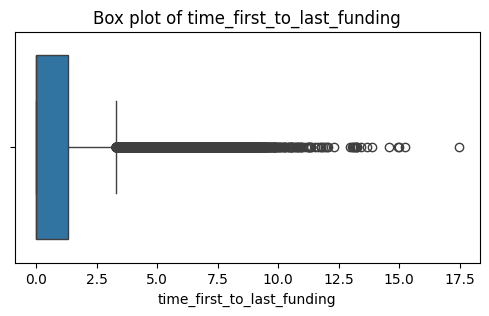

In [ ]:
# Filter out non-numeric columns if necessary
numeric_cols = data.select_dtypes(include=['float64', 'int64'])

# Plot box plots for each numeric variable
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

#### Correlations

Based on the below, the strongest correlations occur between debt_financing and funding_total_usd, round_H and round_G, followed by venture and all of the rounds of funding

In [ ]:
# with status
encoder = LabelEncoder()
heatmap_data = pd.concat([pd.Series(encoder.fit_transform(data['status'])), 
                          data.drop('status', axis=1)], axis=1)

# without status
#heatmap_data = data.drop('status', axis=1)

h_corr = heatmap_data.corr()
fig, ax = plt.subplots(figsize=(20, 20))
mask = np.triu(np.ones_like(h_corr, dtype=bool))
cmap = sns.diverging_palette(130, 50, as_cmap=True)
cbar_kws = {'label': 'Correlation', 'orientation': 'horizontal', 
            'pad': .1, 'extend': 'both'}
sns.heatmap(data=h_corr, mask=mask, ax=ax, annot=True, cbar_kws=cbar_kws, cmap=cmap)
ax.set_title('Heatmap of Correlation Between Attributes (Including Status)')

ValueError: could not convert string to float: '#waywire'

In [ ]:
#data_corr=data.drop(columns=['status'], axis=1).corr()
corr = h_corr.abs().stack().reset_index().sort_values(0, ascending=False)
corr['pairs'] = list(zip(corr.level_0, corr.level_1))
corr.set_index(['pairs'], inplace = True)
corr.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
corr.columns = ['cc']
corr.drop_duplicates(inplace=True)

corr[(corr['cc'] > 0.7) & (corr['cc'] < 1)]

,cc
pairs,
"(round_H, round_G)",0.859849
"(funding_rounds, time_first_to_last_funding)",0.793787


In [ ]:
# dropping temp columns 
data = data.drop(columns=['founded_at', 'first_funding_at', 'last_funding_at', 
                          'first_funding_at_temp', 'last_funding_at_temp', 
                          'founded_at_temp'], axis=1).reset_index(drop=True)

# creating csv file to work from
data.to_csv('data/final_working_data.csv')

In [ ]:
# dropping columns with correlation coefficient greater than 0.7
data_uncorr = data.drop(columns=['round_H', 'time_first_to_last_funding'], 
                        axis=1).reset_index(drop=True)

#renaming full dataset
data_full = data

#### OPTIONAL - Binary Representation of Funding Rounds

In [ ]:
# data['had_round_A'] = [0 if x==0 else 1 for x in data['round_A']]
# data['had_round_B'] = [0 if x==0 else 1 for x in data['round_B']]
# data['had_round_C'] = [0 if x==0 else 1 for x in data['round_C']]
# data['had_round_D'] = [0 if x==0 else 1 for x in data['round_D']]
# data['had_round_E'] = [0 if x==0 else 1 for x in data['round_E']]
# data['had_round_F'] = [0 if x==0 else 1 for x in data['round_F']]
# data['had_round_G'] = [0 if x==0 else 1 for x in data['round_G']]
# data['had_venture'] = [0 if x==0 else 1 for x in data['venture']]
# data['had_seed'] = [0 if x==0 else 1 for x in data['seed']]
# data['had_eq_crowdfunding'] = [0 if x==0 else 1 for x in data['equity_crowdfunding']]
# data['had_pd_crowdfunding'] = [0 if x==0 else 1 for x in data['product_crowdfunding']]
# data['had_angel'] = [0 if x==0 else 1 for x in data['angel']]
# data['had_grant'] = [0 if x==0 else 1 for x in data['grant']]
# data['had_pe'] = [0 if x==0 else 1 for x in data['private_equity']]
# data['had_convert'] = [0 if x==0 else 1 for x in data['convertible_note']]